La bande interdite est à  0.9179000000000004 eV
Plus d'info :  {'direct': True, 'energy': 0.9179000000000004, 'transition': '\\Gamma-\\Gamma'}


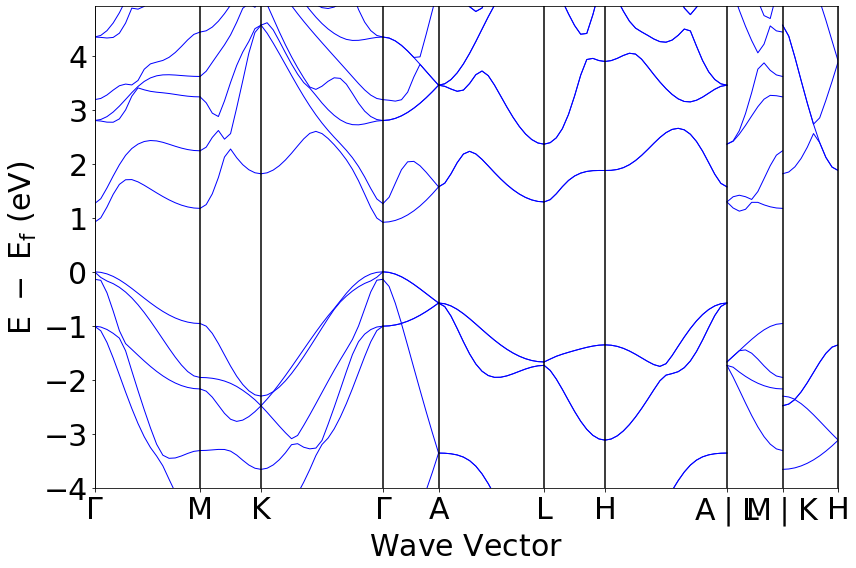

In [20]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot as plt
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter

with MPRester("KwnCeSBHTUbZ9VP0") as m:
    bdstruc=m.get_bandstructure_by_material_id("mp-1018100")

### déterminer la bande interdite
BSPlotter(bdstruc).get_plot()
print("La bande interdite est à ", bdstruc.get_direct_band_gap(), "eV")
print("Plus d'info : ",bdstruc.get_band_gap())

In [21]:
### trouver la direction dans laquelle la dernière (première) bande
#de valence (conduction) présente le plus et le moins de dispersion
#(insérer une figure indiquant la dispersion par des flèches)

BEn = BSPlotter(bdstruc).bs_plot_data()['energy']
Bk = BSPlotter(bdstruc).bs_plot_data()['distances']
print( "La 7e bande de valence a l'énergie la plus haute :",bdstruc.get_vbm()['band_index'])
print( "La 8e bande de conduction a l'énergie la plus basse :",bdstruc.get_cbm()['band_index'])

La 7e bande de valence a l'énergie la plus haute : defaultdict(<class 'list'>, {<Spin.up: 1>: [6, 7]})
La 8e bande de conduction a l'énergie la plus basse : defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})


In [22]:
#Plus grandes et plus petites dispersions
a = np.zeros(len(Bk)) ; hval = np.zeros(len(BEn)) ; hcond = np.zeros(len(BEn))
pv = 0 ; pvmax = 0 ; pvmin = 1000 ; ivmax = 0 ; ivmin = 0 ; pc = 0 ; pcmax = 0 ; pcmin = 1000 ; icmax = 0 ; icmin = 0

for i in range(len(BEn)):
    hcond[i] = BEn[i]['1'][8][0] - BEn[i]['1'][8][-1]
    hval[i] = BEn[i]['1'][7][0] - BEn[i]['1'][7][-1]

for i in range(len(Bk)):
    a[i] = Bk[i][0]-Bk[i][-1]
    pv = abs(hval[i]/a[i]) ; pc = abs(hcond[i]/a[i])
    if pc >= pcmax: 
        pcmax = pc
        icmax = i
    if pc <= pcmin:
        pcmin = pv
        icmin = i
    if pv >= pvmax: 
        pvmax = pv
        ivmax = i
    if pv <= pvmin:
        pvmin = pv
        ivmin = i

print("Branche de la bande de valence avec la plus petite pente :",icmin,"; avec une valeur de :",pcmin)
print("Branche de la bande de valence avec la plus grande pente :",icmax,"; avec une valeur de :",pcmax)
print()
print("Branche de la bande de conduction avec la plus petite pente :",ivmin,"; avec une valeur de :",pvmin)
print("Branche de la bande de conduction avec la plus grande pente :",ivmax,"; avec une valeur de :",pvmax)

Branche de la bande de valence avec la plus petite pente : 8 ; avec une valeur de : 2.185059061414611
Branche de la bande de valence avec la plus grande pente : 3 ; avec une valeur de : 1.5100244893555284

Branche de la bande de conduction avec la plus petite pente : 5 ; avec une valeur de : 0.6663623739740386
Branche de la bande de conduction avec la plus grande pente : 1 ; avec une valeur de : 2.8257883452629784


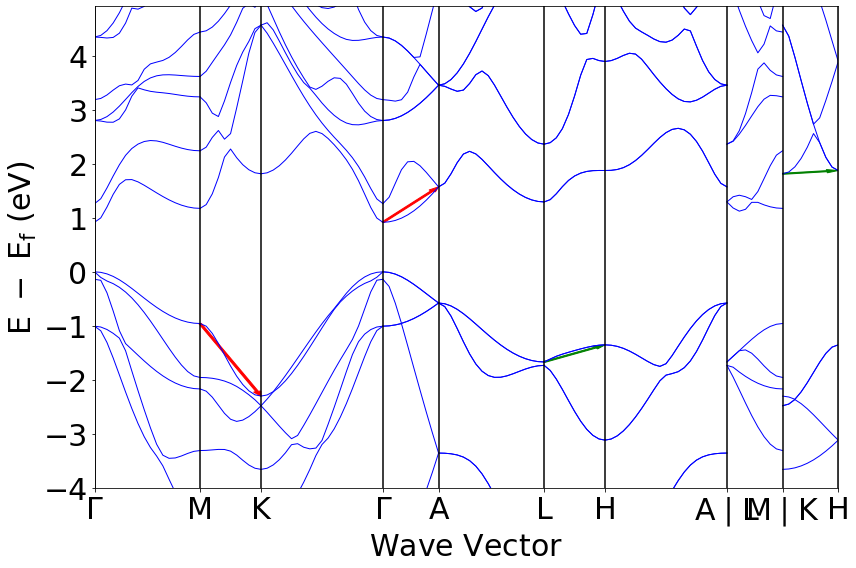

In [23]:
#Plot avec des flèches
BSPlotter(bdstruc).get_plot()
plt.arrow(Bk[ivmin][0],BEn[ivmin]['1'][7][0],Bk[ivmin][-1]-Bk[ivmin][0],BEn[ivmin]['1'][7][-1]-BEn[ivmin]['1'][7][0],color='green',width = 0.02,length_includes_head=True) #plus petite pente de la bande de valence
plt.arrow(Bk[ivmax][0],BEn[ivmax]['1'][7][0],Bk[ivmax][-1]-Bk[ivmax][0],BEn[ivmax]['1'][7][-1]-BEn[ivmax]['1'][7][0],color='red',width = 0.02,length_includes_head=True) #plus grande pente de la bande de valence
plt.arrow(Bk[icmin][0],BEn[icmin]['1'][8][0],Bk[icmin][-1]-Bk[icmin][0],BEn[icmin]['1'][8][-1]-BEn[icmin]['1'][8][0],color='green',width = 0.02,length_includes_head=True) #plus petite pente de la bande de conduction
plt.arrow(Bk[icmax][0],BEn[icmax]['1'][8][0],Bk[icmax][-1]-Bk[icmax][0],BEn[icmax]['1'][8][-1]-BEn[icmax]['1'][8][0],color='red',width = 0.02,length_includes_head=True) #plus grande pente de la bande de conduction
plt.show()

In [24]:
### calculer la masse effective au sommet (base) de la dernière (première)
#bande de valence (conduction) en supposant une dispersion parabolique.
### masse eff à la base de la première bande de conduction
h = 6.58212e-16
ec = bdstruc.get_cbm()['energy']
kc = np.linalg.norm(bdstruc.get_cbm()['kpoint'].cart_coords)
mc = (h**2)/(2*ec)*(kc**2)
print("La masse eff à la base de la bande de conduction vaut :", mc, '[kg]')

### masse eff au sommet de la dernière bande de conduction
ev = bdstruc.get_vbm()['energy']
kv = np.linalg.norm(bdstruc.get_vbm()['kpoint'].cart_coords)
mv = (h**2)/(2*ev)*(kv**2)
print("La masse eff à la base de la bande de conduction vaut :", mv, '[kg]')

La masse eff à la base de la bande de conduction vaut : 0.0 [kg]
La masse eff à la base de la bande de conduction vaut : 0.0 [kg]
